In [1]:
import shap

from chessplainer._deprecated.wrapper import StockfishWrapper, ChessExplainer
import chess


In [32]:
MATE_VALUE = 100

True


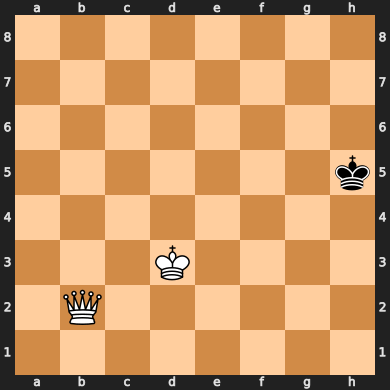

In [169]:
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1")  # black to move
board = chess.Board("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 1")  # white to move
# board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")
# board = chess.Board("5k2/4ppp1/8/8/2K5/5R2/8/8 w - - 0 1")
# board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/8/8 w - - 0 1")

# board = chess.Board("Q7/4pkp1/4p1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
# board = chess.Board("Q7/4pkp1/3rp1p1/8/2K2P2/5R2/1q6/8 w - - 0 1")
#
# board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5P2/5R2/6q1 w - - 0 1")
#
# board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 b - - 0 1")




# board = chess.Board("Q7/4pkp1/4p1p1/8/2K5/5R2/8/8 w - - 0 1")
# board = chess.Board("2r1r1k1/5pbp/4pBp1/2qpP3/p2R4/P1P1Q2P/5PP1/4R2K w - - 0 1") # reddit

# board = chess.Board("5K2/8/8/P3pkp1/p6p/4P2P/1nN5/8 w - - 0 1")
board = chess.Board("8/6q1/8/8/8/5k2/8/4K3 b - - 0 1")  # black to mate
board = chess.Board("8/8/8/7k/8/3K4/1Q6/8 w - - 0 1")  # white to mate
# board = chess.Board("3q1k2/8/8/8/8/8/2R5/2K5 w - - 0 1")
# board = chess.Board("3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1")
# board = chess.Board("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR b KQkq - 0 1")
# board = chess.Board()
print(board.turn)
board

In [174]:
engine = StockfishWrapper(
    path="stockfish",
    fit_analyze_time=0.1,
    predict_analyze_time=0.1,
    output_improvement_delta=True,
    mate_value=MATE_VALUE
)

In [175]:
engine.fit([board])
engine.base_score_

100

In [178]:
score = engine.engine.analyse(board, limit=chess.engine.Limit(time=2))["score"]

In [184]:
score.wdl(model="lichess").white().losses

2

In [149]:
chesshap = ChessExplainer(board, engine, explainer=shap.KernelExplainer, mate_value=MATE_VALUE)
print(chesshap.engine.base_score_)

0.0


In [115]:
chesshap.explain()
# chesshap.shap_values(10)

  0%|          | 0/1 [00:00<?, ?it/s]

.values =
array([[  52.15666667,   58.34166667, -110.49833333]])

.base_values =
array([0.])

.data =
array([[1., 1., 1.]])

False
True
False
125.49


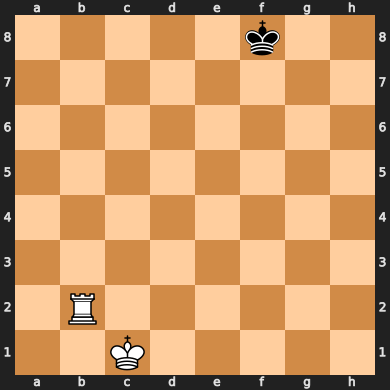

In [116]:
i = 0
print(chesshap.engine.base_board_.turn)
print(chesshap.engine.predict_boards_[i].is_valid())
print(chesshap.engine.predict_boards_[i].is_checkmate())
print(chesshap.engine.predict_evals_[i])
# print(chesshap.engine.multipliers_[i])
chesshap.engine.predict_boards_[i]


In [117]:
chesshap.values_.sum() + chesshap.explainer_.expected_value - chesshap.engine.base_score_

np.float64(0.0)

In [118]:
chesshap.explainer_.expected_value

0.0

In [119]:
chesshap.engine.base_score_

0.0

In [120]:
chesshap.values_.sum()

np.float64(0.0)

In [121]:
chesshap.values_

array([[  52.15666667,   58.34166667, -110.49833333]])

In [122]:
chesshap.explainer_.expected_value

0.0

In [123]:
chesshap.feature_names

['♖ b2', '♖ c2', '♛ d8']

In [124]:
chesshap.explanation_.feature_names = chesshap.feature_names

In [125]:
dir(chesshap.explanation_)

['__add__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_apply_binary_operator',
 '_flatten_feature_names',
 '_numpy_func',
 '_s',
 '_use_data_as_feature_names',
 'abs',
 'argsort',
 'base_values',
 'clustering',
 'cohorts',
 'compute_time',
 'data',
 'display_data',
 'error_std',
 'feature_names',
 'flip',
 'hclust',
 'hierarchical_values',
 'hstack',
 'identity',
 'instance_names',
 'lower_bounds',
 'main_effects',
 'max',
 'mean',
 'min',
 'op_history',
 'output_dims',
 'output_ind

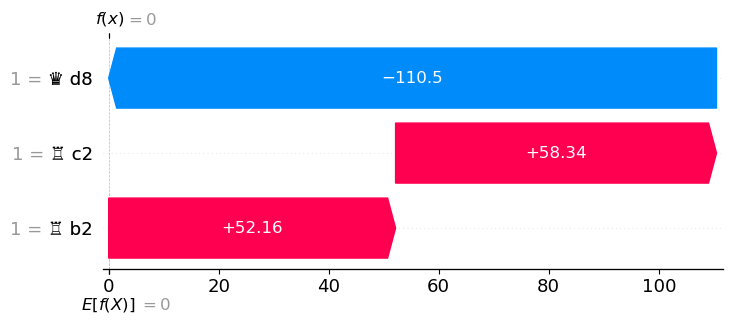

In [126]:
shap.plots.waterfall(chesshap.explanation_[0], max_display=14)

In [127]:
chesshap.explainer_.expected_value, chesshap.engine.base_score_

(0.0, 0.0)

In [128]:
# chesshap.plot()

In [129]:
# chesshap.plot(absolute=False)

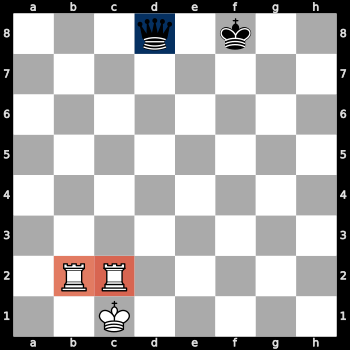

In [130]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

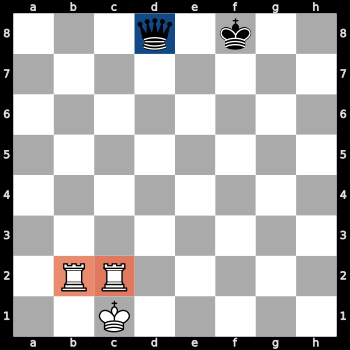

In [131]:
chesshap.to_svg(local_range=True, colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        })

In [132]:
print(chesshap.to_latex())


    \definecolor{shapb2}{HTML}{E17B61}
\definecolor{shapc2}{HTML}{D86551}
\definecolor{shapd8}{HTML}{053061}
    
    \newgame
    \chessboard[
      setfen=3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapb2,
  colorbackfield={b2},
  color=shapc2,
  colorbackfield={c2},
  color=shapd8,
  colorbackfield={d8}
    ]
    


In [133]:
print(chesshap.to_latex(local_range=True))


    \definecolor{shapb2}{HTML}{E88B6E}
\definecolor{shapc2}{HTML}{E0785F}
\definecolor{shapd8}{HTML}{053061}
    
    \newgame
    \chessboard[
      setfen=3q1k2/8/8/8/8/8/1RR5/2K5 b - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapb2,
  colorbackfield={b2},
  color=shapc2,
  colorbackfield={c2},
  color=shapd8,
  colorbackfield={d8}
    ]
    
